Matplotlib version: 3.9.0
Pandas version: 2.2.2
Numpy version: 2.0.0


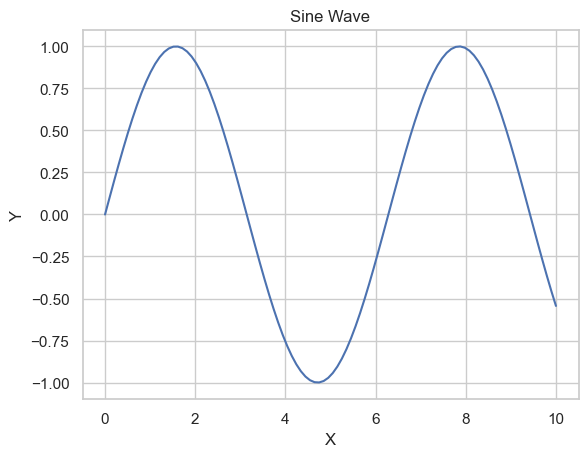

In [1]:
# Importar y configurar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización para gráficos
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

# Verificar las versiones de las librerías
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")

# Crear un gráfico simple para verificar Matplotlib
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.plot(x, y)
plt.title("Sine Wave")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [8]:
import os
import pandas as pd

# Ruta relativa del archivo Excel
relative_path = '../../data/raw/MJ-JUNIO-2024.xlsx'

# Obtener la ruta absoluta del archivo Excel
current_dir = os.getcwd()
ruta_excel = os.path.abspath(os.path.join(current_dir, relative_path))

# Verificar si el archivo existe
if os.path.exists(ruta_excel):
    print(f"El archivo {ruta_excel} existe en la ruta: {ruta_excel}")
    # Leer el archivo Excel, saltando las primeras filas innecesarias
    df = pd.read_excel(ruta_excel, skiprows=5)
    # Eliminar la columna sin nombre que no contiene datos
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    # Renombrar columnas
    df.columns = [
        'Numero', 'Nombre', 'Cargo', 'Area', 'Estatus', 'Sexo', 'Fecha_Entrada', 
        'Sueldo_Bruto', 'AFP', 'ISR', 'SFS', 'Otros_Descuentos', 'Total_Descuentos', 
        'Neto'
    ]
    # Mostrar las primeras filas del DataFrame con las columnas renombradas
    print("Primeras filas del DataFrame con columnas renombradas:\n", df.head())
else:
    print(f"El archivo {ruta_excel} no se encontró en la ruta: {ruta_excel}")

# Convertir la columna 'Fecha_Entrada' a tipo datetime
df['Fecha_Entrada'] = pd.to_datetime(df['Fecha_Entrada'], errors='coerce')

# Convertir columnas numéricas a tipo float
cols_to_convert = ['Sueldo_Bruto', 'AFP', 'ISR', 'SFS', 'Otros_Descuentos', 'Total_Descuentos', 'Neto']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Guardar en un archivo Excel para revisión
output_path = os.path.abspath(os.path.join(current_dir, '../../data/clean/MJ-JUNIO-2024_clean.xlsx'))
df.to_excel(output_path, index=False)
print(f"Datos guardados en {output_path}")


El archivo c:\Users\bourd\source\repos\IncomeInference\data\raw\MJ-JUNIO-2024.xlsx existe en la ruta: c:\Users\bourd\source\repos\IncomeInference\data\raw\MJ-JUNIO-2024.xlsx
Primeras filas del DataFrame con columnas renombradas:
   Numero                       Nombre                   Cargo  \
0      1    RAFAEL JESUS FELIZ GARCIA                MINISTRO   
1      2   ANA ELIZABETH DIAZ RAMIREZ    SECRETARIA EJECUTIVA   
2      3         CAMILO CAMILO PUJOLS  ASISTENTE DEL DESPACHO   
3      4   CRISTY MACOLLE ORTIZ ARIAS    SECRETARIA EJECUTIVA   
4      5  WELINGTON ALBERTO MORA PIÑA     CHOFER DEL MINISTRO   

                    Area                             Estatus       Sexo  \
0  DESPACHO DEL MINISTRO         EMPLEADO FIJO (POR DECRETO)  MASCULINO   
1  DESPACHO DEL MINISTRO  EMPLEADA DE CARRERA ADMINISTRATIVA   FEMENINO   
2  DESPACHO DEL MINISTRO                      EMPLEADO FIJO   MASCULINO   
3  DESPACHO DEL MINISTRO                       EMPLEADA FIJA   FEMENINO   
4  D

Pandas version: 2.2.2
Numpy version: 2.0.0
Matplotlib version: 3.9.0
Primeros registros del DataFrame limpio:
   Numero                       Nombre                   Cargo  \
0      1    RAFAEL JESUS FELIZ GARCIA                MINISTRO   
1      2   ANA ELIZABETH DIAZ RAMIREZ    SECRETARIA EJECUTIVA   
2      3         CAMILO CAMILO PUJOLS  ASISTENTE DEL DESPACHO   
3      4   CRISTY MACOLLE ORTIZ ARIAS    SECRETARIA EJECUTIVA   
4      5  WELINGTON ALBERTO MORA PIÑA     CHOFER DEL MINISTRO   

                    Area                             Estatus       Sexo  \
0  DESPACHO DEL MINISTRO         EMPLEADO FIJO (POR DECRETO)  MASCULINO   
1  DESPACHO DEL MINISTRO  EMPLEADA DE CARRERA ADMINISTRATIVA   FEMENINO   
2  DESPACHO DEL MINISTRO                      EMPLEADO FIJO   MASCULINO   
3  DESPACHO DEL MINISTRO                       EMPLEADA FIJA   FEMENINO   
4  DESPACHO DEL MINISTRO                      EMPLEADO FIJO   MASCULINO   

  Fecha_Entrada  Sueldo_Bruto     AFP       ISR

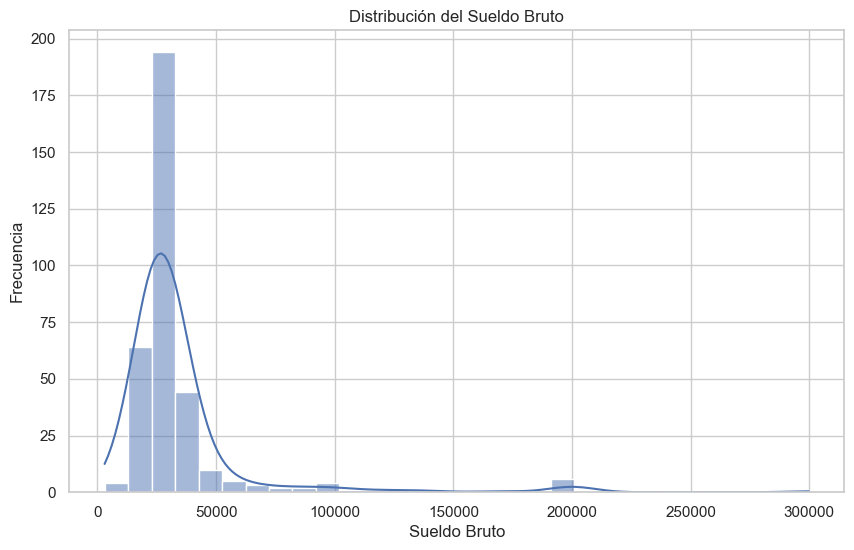

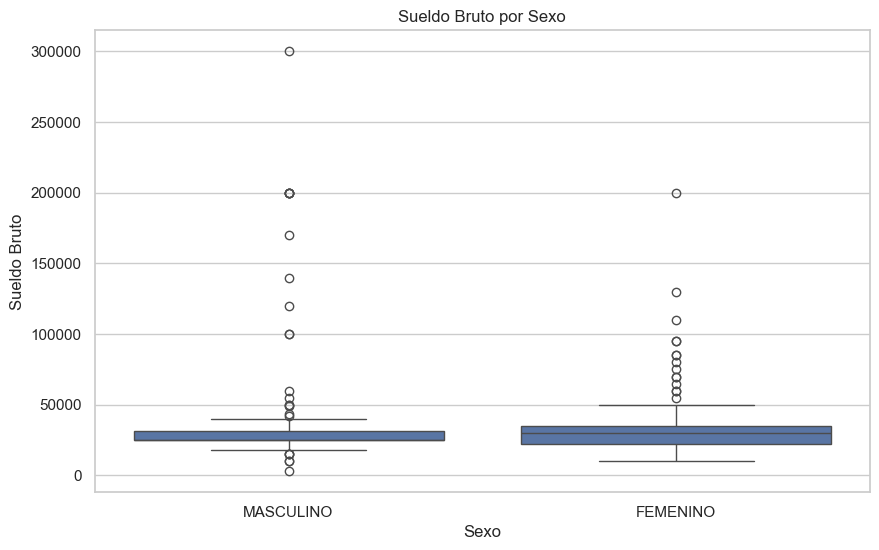

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización para gráficos
sns.set(style="whitegrid")

# Mostrar todas las columnas de los dataframes
pd.set_option('display.max_columns', None)

# Verificar las versiones de las librerías
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")

# Ver los primeros registros del DataFrame
print("Primeros registros del DataFrame limpio:\n", df.head())

# Verificar los tipos de datos de cada columna
print("\nTipos de datos del DataFrame:\n", df.dtypes)

# Verificar la existencia de valores nulos
print("\nValores nulos en cada columna:\n", df.isnull().sum())

# Análisis descriptivo básico
print("\nEstadísticas descriptivas del DataFrame:\n", df.describe())

# Histograma de la columna 'Sueldo_Bruto'
plt.figure(figsize=(10, 6))
sns.histplot(df['Sueldo_Bruto'], kde=True, bins=30)
plt.title('Distribución del Sueldo Bruto')
plt.xlabel('Sueldo Bruto')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot de 'Sueldo_Bruto' por 'Sexo'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sexo', y='Sueldo_Bruto', data=df)
plt.title('Sueldo Bruto por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Sueldo Bruto')
plt.show()


In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Convertir todos los valores de las columnas categóricas a cadenas
categorical_columns = ['Nombre', 'Cargo', 'Area', 'Estatus', 'Sexo']
for col in categorical_columns:
    df[col] = df[col].astype(str)

# Codificar variables categóricas
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Normalizar y estandarizar las columnas numéricas
numeric_columns = ['Sueldo_Bruto', 'AFP', 'ISR', 'SFS', 'Otros_Descuentos', 'Total_Descuentos', 'Neto']
scaler = StandardScaler()

# Aplicar el escalador solo a las columnas numéricas
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Mostrar las primeras filas del DataFrame después de la codificación y normalización
print("Primeras filas del DataFrame después de la codificación y normalización:\n", df.head())


Primeras filas del DataFrame después de la codificación y normalización:
   Numero  Nombre  Cargo  Area  Estatus  Sexo Fecha_Entrada  Sueldo_Bruto  \
0      1      96     39    28        6     1    2021-12-15      8.321631   
1      2      35     46    28        0     0    2018-12-01      1.098979   
2      3     206     76    28        5     1    2022-01-01      3.297177   
3      4     231     46    28        1     0    2022-01-01      0.784950   
4      5     160     11    28        5     1    2022-01-01      0.470922   

        AFP       ISR       SFS  Otros_Descuentos  Total_Descuentos      Neto  
0  8.321631  9.343160  5.463773         -0.333945          8.461060  8.189855  
1  1.098979  0.624983  1.217534         -0.333945          0.667436  1.239474  
2  3.297177  3.203475  3.623822         -0.333945          3.101368  3.333064  
3  0.784950  0.324461  0.873779         -0.333945          0.370702  0.922503  
4  0.470922  0.022628  0.530023          0.990276          0.278838  

In [2]:
import os
import pandas as pd

# Ruta relativa del archivo Excel
relative_path = '../../data/raw/MJ-JUNIO-2024.xlsx'

# Obtener la ruta absoluta del archivo Excel
current_dir = os.getcwd()
ruta_excel = os.path.abspath(os.path.join(current_dir, relative_path))

# Verificar si el archivo existe
if os.path.exists(ruta_excel):
    print(f"El archivo {ruta_excel} existe en la ruta: {ruta_excel}")
    # Leer el archivo Excel, saltando las primeras filas innecesarias
    df = pd.read_excel(ruta_excel, skiprows=5)
    # Eliminar la columna sin nombre que no contiene datos
    df = df.drop(columns=['Unnamed: 0'])
    # Renombrar columnas
    df.columns = [
        'Numero', 'Nombre', 'Cargo', 'Area', 'Estatus', 'Sexo', 'Fecha_Entrada', 
        'Sueldo_Bruto', 'AFP', 'ISR', 'SFS', 'Otros_Descuentos', 'Total_Descuentos', 
        'Neto'
    ]
    # Mostrar las primeras filas del DataFrame con las columnas renombradas
    print("Primeras filas del DataFrame con columnas renombradas:\n", df.head())
else:
    print(f"El archivo {ruta_excel} no se encontró en la ruta: {ruta_excel}")

# Convertir la columna 'Fecha_Entrada' a tipo datetime
df['Fecha_Entrada'] = pd.to_datetime(df['Fecha_Entrada'], errors='coerce')

# Convertir columnas numéricas a tipo float
cols_to_convert = ['Sueldo_Bruto', 'AFP', 'ISR', 'SFS', 'Otros_Descuentos', 'Total_Descuentos', 'Neto']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Eliminar filas con valores no numéricos
df = df.dropna(subset=cols_to_convert)

# Guardar en un archivo Excel limpio para revisión
output_path = os.path.abspath(os.path.join(current_dir, '../../data/clean/MJ-JUNIO-2024_clean.xlsx'))
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df.to_excel(output_path, index=False)
print(f"Datos guardados en {output_path}")


El archivo c:\Users\bourd\source\repos\IncomeInference\data\raw\MJ-JUNIO-2024.xlsx existe en la ruta: c:\Users\bourd\source\repos\IncomeInference\data\raw\MJ-JUNIO-2024.xlsx
Primeras filas del DataFrame con columnas renombradas:
   Numero                       Nombre                   Cargo  \
0      1    RAFAEL JESUS FELIZ GARCIA                MINISTRO   
1      2   ANA ELIZABETH DIAZ RAMIREZ    SECRETARIA EJECUTIVA   
2      3         CAMILO CAMILO PUJOLS  ASISTENTE DEL DESPACHO   
3      4   CRISTY MACOLLE ORTIZ ARIAS    SECRETARIA EJECUTIVA   
4      5  WELINGTON ALBERTO MORA PIÑA     CHOFER DEL MINISTRO   

                    Area                             Estatus       Sexo  \
0  DESPACHO DEL MINISTRO         EMPLEADO FIJO (POR DECRETO)  MASCULINO   
1  DESPACHO DEL MINISTRO  EMPLEADA DE CARRERA ADMINISTRATIVA   FEMENINO   
2  DESPACHO DEL MINISTRO                      EMPLEADO FIJO   MASCULINO   
3  DESPACHO DEL MINISTRO                       EMPLEADA FIJA   FEMENINO   
4  D